# AFCS Assignment 1

In [1]:
library(fpp2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
── Attaching packages ────────────────────────────────────────────── fpp2 2.4 ──
✔ ggplot2   3.1.1     ✔ fma       2.4  
✔ forecast  8.13      ✔ expsmooth 2.3  



In [9]:
library(urca)

In [10]:
options(repr.plot.res = 75)

## Exercise 1.5

### A)

#### wmurders

Annual female murder rate (per 100,000 standard population) in the USA. 1950-2004.
Description
Total Murdered women, per 100 000 standard population.

Format
Annual time series of class ts.

Source
Gapminder Foundation.

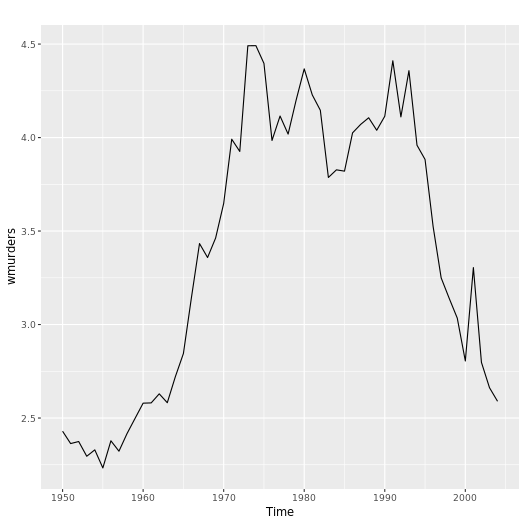

In [3]:
autoplot(wmurders)

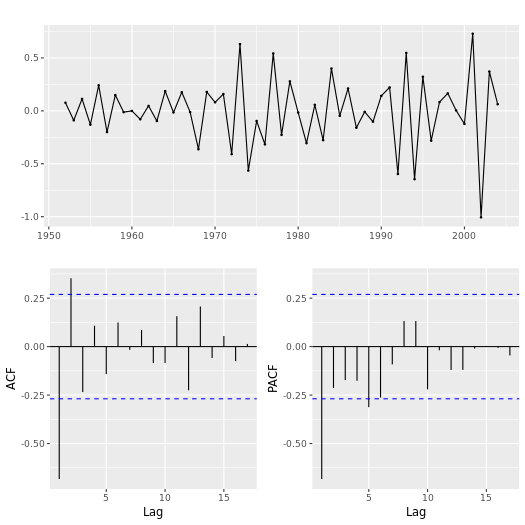

In [34]:
wmurders %>% diff() %>% diff() %>%
  ggtsdisplay()

### a.1) 
By studying appropriate graphs of the series in R, find an appropriate ARIMA(p, d, q) model for these data.

The appropriate ARIMA model is 1,1,1 for p,d,q, respectively.

- AR(0) is appropriate as there is no exponential decay in ACF
- D(2) is appropriate as 2 differences are required to quickly reduce ACF, D(1) has ACF decay too slowly
- MA(1) is appropriate as there is a single significant spike in ACF and there is an element of expoential decay in PACF



### a.2)
Should you include a constant in the model? Explain.

### a.3)
Write this model in terms of the backshift operator.

### a.4)
Fit the model using R and examine the residuals. Is the model satisfactory?

Yes the model is satisfactory. Test of residuals show a normal distribution, both graphically and with the Ljung-Box test

In [44]:
(fit <- Arima(wmurders, order=c(0,2,1)))

Series: wmurders 
ARIMA(0,2,1) 

Coefficients:
          ma1
      -0.8995
s.e.   0.0669

sigma^2 estimated as 0.04747:  log likelihood=5.24
AIC=-6.48   AICc=-6.24   BIC=-2.54


	Ljung-Box test

data:  Residuals from ARIMA(0,2,1)
Q* = 13.04, df = 9, p-value = 0.1608

Model df: 1.   Total lags used: 10



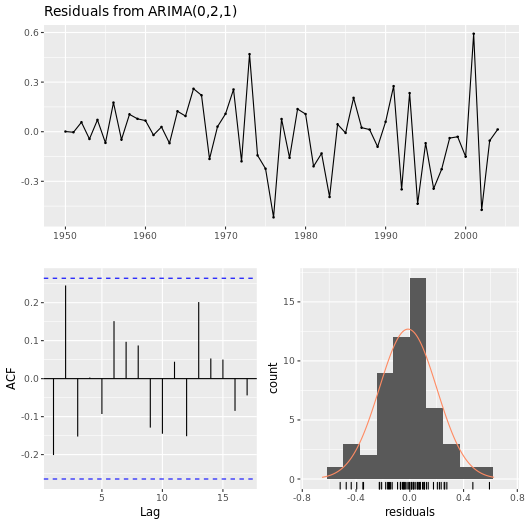

In [45]:
checkresiduals(fit)

### a.5)
Forecast three times ahead. Check your forecasts by hand to make sure that you know how they have been calculated.

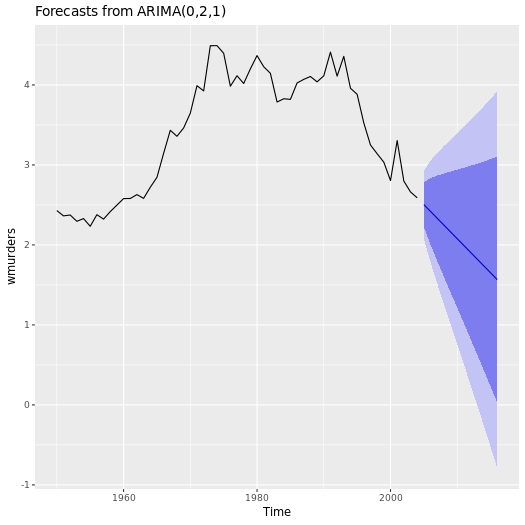

In [50]:
autoplot(forecast(fit,h=12))

### a.6)
Create a plot of the series with forecasts and prediction intervals for the next three periods shown.

### a.7)
Does auto.arima() give the same model you have chosen? If not, which model do you think is better?

In [5]:
auto.arima(wmurders)

Series: wmurders 
ARIMA(1,2,1) 

Coefficients:
          ar1      ma1
      -0.2434  -0.8261
s.e.   0.1553   0.1143

sigma^2 estimated as 0.04632:  log likelihood=6.44
AIC=-6.88   AICc=-6.39   BIC=-0.97

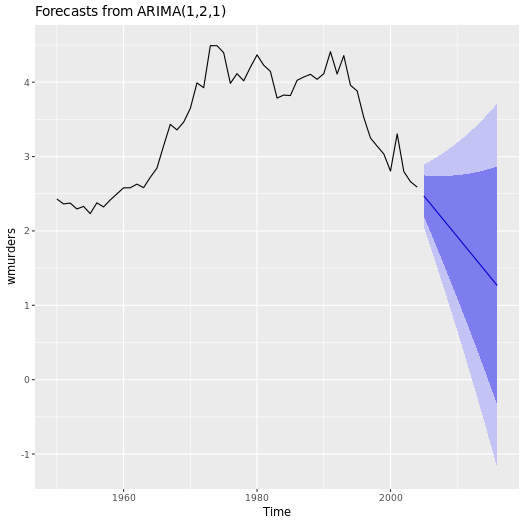

In [49]:
autoplot(forecast(auto.arima(wmurders),h=12))

### B)

#### usgdp

Quarterly US GDP
Description
Quarterly US GDP. 1947:1 - 2006.1

### C)

#### usmelec

Electricity monthly total net generation. January 1973 - June 2013.
Description
Electricity net generation measured in billions of kilowatt hours (kWh).

Format
Time series object of class ts.

Source
US Energy Information Administration.

### D)

#### austourists

nternational Tourists to Australia: Total visitor nights.
Description
Quarterly visitor nights (in millions) spent by international tourists to Australia. 1999-2015.

Format
Quarterly time series of class ts.

Source
Tourism Research Australia.

In [8]:
help(austourists)